# UpdateView

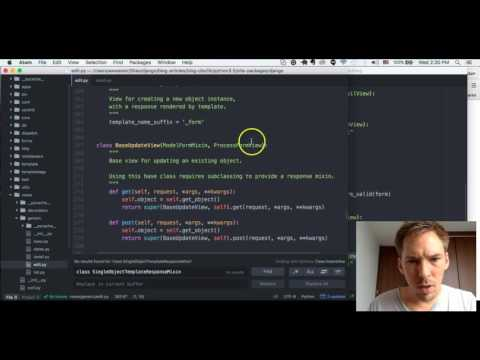

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('_PSeE5MJU54',width=600, height=400)

### Example

[source](https://github.com/PresenceHealth/HealthViz/blob/9c9ad0a3ed921338585cb6f9c2048e966e4df701/geo/views.py#L266)


```python


class RegionCreate(CreateView):
    """View for creating a new region."""
    model = Region
    fields = ['name', 'geographies', 'description', 'privacy']

    def form_valid(self, form):
        form.instance.added_by = self.request.user
        return super(RegionCreate, self).form_valid(form)

    @method_decorator(login_required)
    def dispatch(self, *args, **kwargs):
        return super(RegionCreate, self).dispatch(*args, **kwargs)


class RegionUpdate(UpdateView):
    model = Region
    fields = ['name', 'geographies', 'description', 'privacy']
    
    @method_decorator(login_required)
    def dispatch(self, *args, **kwargs):
        object = super(RegionUpdate, self).get_object()
        if object.added_by != self.request.user:
            raise Http404('You do not have permission to edit this region.')
        return super(RegionUpdate, self).dispatch(*args, **kwargs)
        
```